# Visualisations for Report #

#### Loading Necessary Variables and Libraries ####

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#No sampling method variables
%store -r X_train 
%store -r y_train

#ROS method variables
%store -r X_random_over 
%store -r y_random_over

#RUS method variables
%store -r X_random_under 
%store -r y_random_under

#Smote+Tomeklinks method variables
%store -r X_smotee_tomek 
%store -r y_smote_tomek


### Class Imbalance ###

/var/folders/ll/w37f_r8j6pxb28fvqbt5q_lc0000gn/T/ipykernel_75759/148700493.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust the rectangle in which to fit the subplots


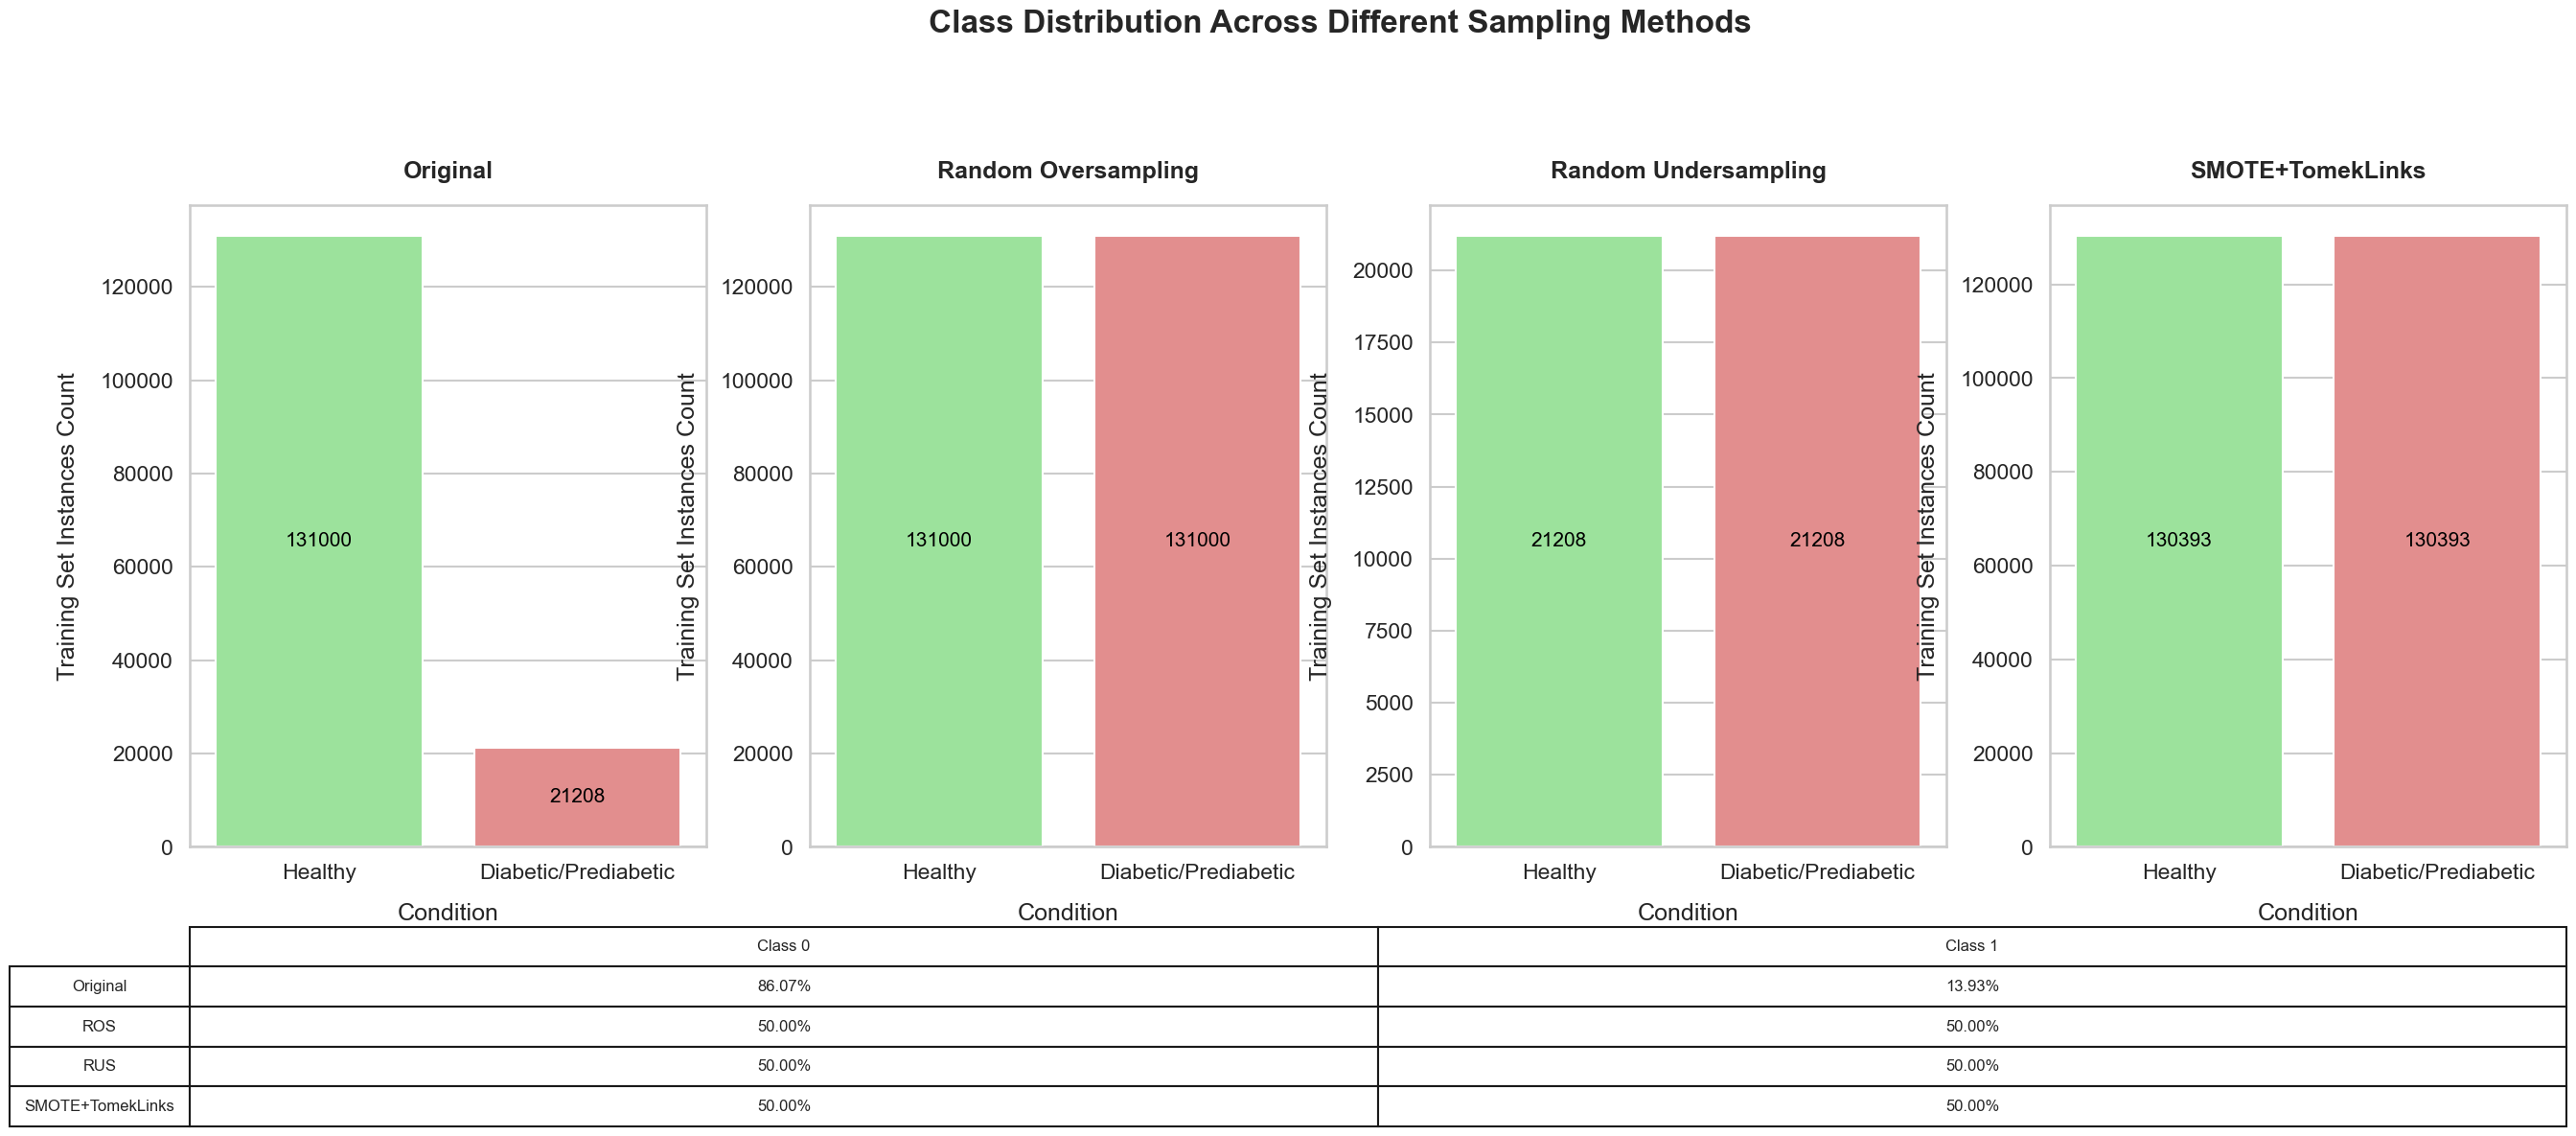

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_original = pd.DataFrame(y_train, columns=['Diabetes_binary'])
df_ros = pd.DataFrame(y_random_over, columns=['Diabetes_binary'])
df_rus = pd.DataFrame(y_random_under, columns=['Diabetes_binary'])
df_smotetomek = pd.DataFrame(y_smote_tomek, columns=['Diabetes_binary'])

dfs = [df_original, df_ros, df_rus, df_smotetomek]  
method_names = ['Original', 'Random Oversampling', 'Random Undersampling', 'SMOTE+TomekLinks']
ratios = {}
for method, df in zip(["Original", "ROS", "RUS", "SMOTE+TomekLinks"], dfs):
    ratio = df['Diabetes_binary'].value_counts(normalize=True).to_dict()
    ratios[method] = ratio


sns.set(style="whitegrid", context="talk")
# Create a grid layout: one row for the plots, one row for the table
fig = plt.figure(figsize=(32, 12))  # Increase the figure height to accommodate the table below
gs = fig.add_gridspec(2, 4, height_ratios=[5, 1], hspace=0.3)  # Adjust space between plots and table

axs = [fig.add_subplot(gs[0, i]) for i in range(4)]

fig.suptitle('Class Distribution Across Different Sampling Methods', fontsize=24, weight='bold', y=1.05)

# Plot the countplots in the axes created for them
for ax, df, method in zip(axs, dfs, method_names):
    df['Class_Label'] = df['Diabetes_binary'].replace({0: 'Healthy', 1: 'Diabetic/Prediabetic'})
    countplot = sns.countplot(x='Class_Label', data=df, ax=ax, hue='Class_Label', palette=['lightgreen', 'lightcoral'], dodge=False)

    ax.set_title(method, fontsize=18, weight='bold', pad=20)
    ax.set_xlabel('Condition', labelpad=15)
    ax.set_ylabel('Training Set Instances Count', labelpad=15)
    
    for p in countplot.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2, f'{int(p.get_height())}',
                fontsize=15, color='black', ha='center', va='center')

ax_table = fig.add_subplot(gs[1, :]) 
ax_table.axis('off') 
table = ax_table.table(cellText=ratios_df.values,
                       colLabels=ratios_df.columns,
                       rowLabels=ratios_df.index,
                       cellLoc='center', rowLoc='center',
                       loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2.5)  
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [1]:
import pandas as pd

filename = 'test.csv'
df = pd.read_csv(filename)
row_count = df.shape[0]
print(f"Number of instances (rows) in the file: {row_count}")

Number of instances (rows) in the file: 50736
